In [1]:
#huggingface
!pip install transformers
#SastrawiStemmer/StopwordsRemover
!pip install PySastrawi

     |████████████████████████████████| 675kB 15.3MB/s 
     |████████████████████████████████| 3.8MB 49.4MB/s 
     |████████████████████████████████| 890kB 53.6MB/s 
     |████████████████████████████████| 1.1MB 50.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=8ad1c0f43529574819db4d426bf623be2f2c6efcb141e98bf46731dd38f4cb90
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 215kB 10.7MB/s 


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from collections import Counter
from numpy import interp
import numpy as np
#from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from transformers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tqdm
import time
#from torch.utils.data import TensorDataset, random_split

from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.layers import Dense, Dropout,Embedding, LSTM, Bidirectional, Input, Dropout, GlobalAveragePooling1D, Flatten, Conv1D, GlobalMaxPooling1D
#from tensorflow.keras import Sequential
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc, confusion_matrix
#from tensorflow.keras.preprocessing import sequence

#import torch

# If there's a GPU available...
#if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
#    device = torch.device("cuda")

#    print('There are %d GPU(s) available.' % torch.cuda.device_count())

#    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
#else:
#    print('No GPU available, using the CPU instead.')
#    device = torch.device("cpu")

In [15]:
#LOAD DATASET
training=pd.read_csv('https://raw.githubusercontent.com/ruzcmc/ClickbaitIndo-textclassifier/master/primary-dataset.csv')
#pd.options.display.max_colwidth=2000




#label_cols = ['text','label']

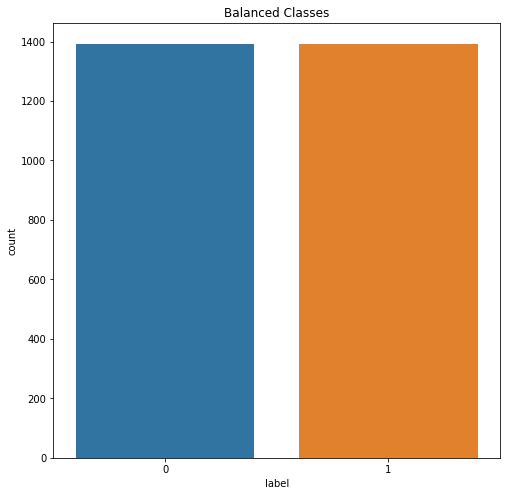

In [16]:
# UNDERSAMPLE IF NEEDED

# Put all the fraud class in a separate dataset.
clickbait_df = training.loc[training['label'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_clickbait_df = training.loc[training['label'] == 0].sample(n=1393,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([clickbait_df, non_clickbait_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('label', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

#print(normalized_df)
tags = normalized_df.label
texts = normalized_df.text
#print(tags)




In [ ]:
#stemming INDO - no need with BERT TOkenizeR
#factory = StemmerFactory()
#stemmer= factory.create_stemmer()

textstemss = []
textstems = []
textstem = []
#for line in texts:
#  outstem = stemmer.stem(line)
#  textstemss.append(outstem)

#stopword remove
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
for line in texts:
  stop = stopword.remove(line)
  textstem.append(stop)

  #hapus angka
#from string import digits

#for line in textstems:
#    remove_digits=str.maketrans(' ', ' ', digits)
#    result=line.translate(remove_digits)
#    textstem.append(result)


print(textstem)
#print(texts)

#X_train, X_test, y_train, y_test = train_test_split(textstem, tags, test_size=0.1, random_state=42)
#print(len(X_train))

['Tito Karnavian Soroti Pelanggaran Protokol Kesehatan Car Free Day', 'Rilis Album Baru, Trisouls Nyanyikan Lagu Risalah Hati Dari Dewa 19', 'Wali Kota Bogor: Meski Masih Panjang, Antrean Penumpang KRL Sudah Lebih Baik', 'Ribut John Kei Nus Kei Dipicu Bagi Hasil Penjualan Tanah', 'The New Normal Pilkada 2020', 'Pertamina Raih Penghargaan Internasional EFMD EIP Gold Award', 'Tahun Ajaran Baru Dibuka 13 Juli, Kemendikbud: Tidak Harus Tatap Muka', 'Kebijakan Ganjil Genap DKI Jakarta Bakal Diberlakukan Situasional', 'Rekaman 8 Menit 46 Detik Drama Kematian George Floyd', 'Jalan Tengah Menghadapi Pandemi Corona', 'Bintang Emon is Getting SLAPP-ed', 'Cerita Suka Duka Perawat Pasien Covid-19 RS Kasih Ibu Surakarta', 'Soal Lawan Juventus Final Coppa Italia, Sarri Enggan Pikirkan', 'Tren Photoshoot Era New Normal Teras Rumah Foto Virtual Solusi', 'Pasca Idul Fitri, Kemenhub Awasi Perbatasan Bekasi-Karawang KM 47 Tol Jakarta-Cikampek', 'Kemendagri Umumkan Pemenang Lomba Video Inovasi Daerah Dala

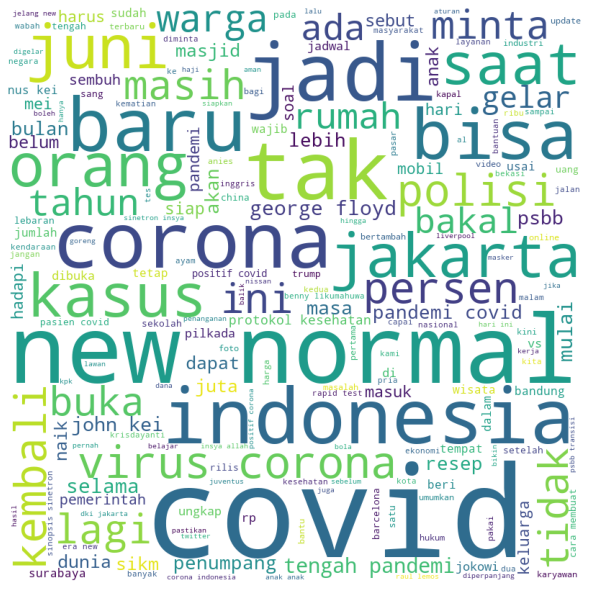

In [ ]:
#descriptive
from wordcloud import WordCloud, STOPWORDS 

  


comment_words = '' 

  
# iterate through the csv file 
for val in textstem: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

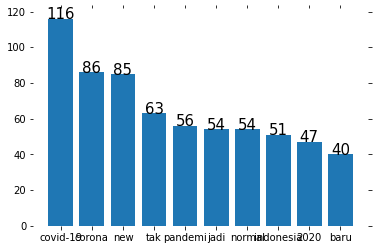

In [ ]:
#descriptive
# Create a list of words by converting to lowercase and splitting
kata = [s.lower().split() for s in textstem if s]
noline_ = [sublist for l in kata for sublist in l]
counts1 = dict(Counter(noline_).most_common(10))
labels1, values1 = zip(*counts1.items())

# sort your values in descending order
indSort1 = np.argsort(values1)[::-1]

# rearrange your data
labels1 = np.array(labels1)[indSort1]
values1 = np.array(values1)[indSort1]

indexes1 = np.arange(len(labels1))

bar_width = 1

mybar=plt.bar(indexes1, values1)
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove all the ticks and directly label each bar with respective value
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# plt.show()

# direct label each bar with Y axis values
for bari in mybar:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=15)
# add labels
plt.xticks(indexes1, labels1)
plt.savefig('/content/drive/My Drive/clickbait-textclassifier/top10words-NONclickbait.png')
plt.show()


In [17]:
#TF x huggingface transformers
MAX_LEN = 22
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

def encodetext(sentence):
  input_ids = []
  attention_masks = []
  for sent in sentence:
      
      encoded_dict = tokenizer.encode_plus(
                          sent,                      
                          add_special_tokens = True,      # '[CLS]' and '[SEP]'
                          max_length = MAX_LEN,           
                          pad_to_max_length = True,       # Pad / truncate 
                          return_attention_mask = True,   # Construct attn. masks.
                          
                          return_token_type_ids=False     
                    )
      
      # Add the encoded sentence to the list.    
      input_ids.append(encoded_dict['input_ids'])
      
      # And its attention mask (simply differentiates padding from non-padding).
      attention_masks.append(encoded_dict['attention_mask'])
  return input_ids,attention_masks


#tags = np.array(tags)
input_ids, attention_masks = np.array(encodetext(texts))
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])
print(tags)


Original:  Purnomo Serahkan Surat Mundur dari Pilkada  ke DPC PDIP Solo
Token IDs: [  101 11379   131 29104 44279 10150 70044 15446 23588   102     0     0
     0     0     0     0     0     0     0     0     0     0]
4       1
11      1
18      1
19      1
22      1
       ..
2995    0
795     0
1846    0
1978    0
1604    0
Name: label, Length: 2786, dtype: int64


In [18]:
#model definition
#custom model #keras Functional model
def createmodel():
  

  token_inputs = Input((MAX_LEN), dtype=tf.int32, name='input_word_ids')
  mask_inputs = Input((MAX_LEN), dtype=tf.int32, name='input_masks')
  

  bert_model = TFBertModel.from_pretrained("bert-base-multilingual-uncased")
  seq_output,_ = bert_model([token_inputs,mask_inputs])
  X = GlobalAveragePooling1D()(seq_output)
  X = Flatten()(X)
  X = Dense(100,activation='relu')(X)
  output_= Dense(1, activation='sigmoid', name='output')(X)

  bert_model2 = Model([token_inputs,mask_inputs],output_)
  return bert_model2

#HF model for Classification
def createhugmodel():
  bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased',num_labels=2)
  
  return bert_model



Running Fold 1 / 5



Epoch 1/3
140/140 [==============================] - 18s 129ms/step - loss: 0.5359 - accuracy: 0.7150
Epoch 2/3
140/140 [==============================] - 18s 130ms/step - loss: 0.3298 - accuracy: 0.8510
Epoch 3/3
140/140 [==============================] - 18s 132ms/step - loss: 0.2254 - accuracy: 0.9111
Confusion matrix
[[254  25]
 [ 66 213]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       279
           1       0.89      0.76      0.82       279

    accuracy                           0.84       558
   macro avg       0.84      0.84      0.84       558
weighted avg       0.84      0.84      0.84       558

accuracy: 83.69%
AUC
0.8369175627240144
Running Fold 2 / 5
Epoch 1/3
140/140 [==============================] - 19s 134ms/step - loss: 0.4816 - accuracy: 0.7649
Epoch 2/3
140/140 [==============================] - 19s 136ms/step - loss: 0.2887 - accuracy: 0.8726
Epoch 3/3
140/140 [==============================] - 19s 135ms/

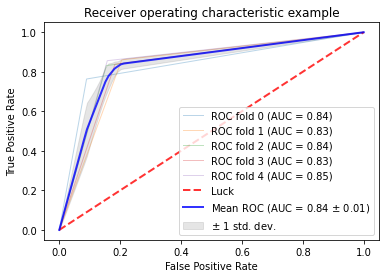

83.60% (+/- 0.80%)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 22)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 22)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 22, 768), (N 167356416   input_word_ids[0][0]             
                                                                 input_masks[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 768)          0           tf_bert_mo

In [7]:
#Kfold CrossVal


from sklearn.metrics import classification_report
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=13)
kfold = kfold.split(input_ids, y=tags)
cvscores = []
tprs = []
aucs = []

mean_fpr = np.linspace(0, 1, 100)

i = 0
opt = keras.optimizers.Adam(learning_rate=1e-05)
for i, (train, test) in enumerate(kfold):

  traindata = [input_ids[train],attention_masks[train]]
  testdata = [input_ids[test],attention_masks[test]]
  ytrain = tags.iloc[train]
  ytest = tags.iloc[test]

  
  print("Running Fold", i+1, "/", n_folds)
  
  bert_model2 = createmodel()

  bert_model2.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=['accuracy'])
  bert_model2.fit(traindata, ytrain, epochs=3,verbose=1,batch_size=16)
  logits = bert_model2.predict(testdata)
  #print(logits) #kalo pake bert layer, ini ga usah tuple langsung aja
  predicts=(logits > 0.5).astype("int32")
  scores = bert_model2.evaluate(testdata, ytest, verbose=0)

  cm = confusion_matrix(ytest, predicts)
  creport = classification_report(ytest, predicts)
  print('Confusion matrix')
  print(cm)
  print(creport)
  print("%s: %.2f%%" % (bert_model2.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
    # Compute ROC curve and area the curve
  fpr, tpr, thresholds = roc_curve(ytest, predicts)
  tprs.append(interp(mean_fpr, fpr, tpr))
  tprs[-1][0] = 0.0
  roc_auc = auc(fpr, tpr)
  print('AUC')
  print(roc_auc)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i += 1
  keras.backend.clear_session()

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/content/drive/My Drive/clickbait-textclassifier/rocauc-BERT.png')
plt.show()

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

bert_model2.summary()

#print(seq_output)
#model.summary()
# Tell pytorch to run this model on the GPU. i gave up on pytorch this time. sorry
#model.cuda()

In [19]:
#save Model for Production ^^

xtraining = [input_ids,attention_masks]
ytraining = tags
opt = keras.optimizers.Adam(learning_rate=1e-05)
bert_model2 = createmodel()

bert_model2.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=['accuracy'])
bert_model2.fit(xtraining, ytraining, epochs=3,verbose=1,batch_size=16)
bert_model2.save('/content/drive/My Drive/clickbait-textclassifier/BERT-IndoClickbaitClassifierMODEL')

Epoch 1/3
175/175 [==============================] - 24s 138ms/step - loss: 0.4765 - accuracy: 0.7778
Epoch 2/3
175/175 [==============================] - 24s 140ms/step - loss: 0.3159 - accuracy: 0.8643
Epoch 3/3
175/175 [==============================] - 24s 138ms/step - loss: 0.2161 - accuracy: 0.9178
INFO:tensorflow:Assets written to: /content/drive/My Drive/clickbait-textclassifier/BERT-IndoClickbaitClassifierMODEL/assets
